# Top Issues Through History, According to Democrats and Republicans

## Using party manifesto transcripts from 1840-2012

In [2]:
import os
import pandas as pd
import nltk
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
# from wordcloud import STOPWORD

plt.rcParams['figure.figsize'] = (15, 5)

# Get initial file path
file_path_d = '/Users/cwang38/Downloads/party_democrat/'
file_path_r = '/Users/cwang38/Downloads/party_republican/'

# Set file variables
file_names_d = []
file_names_r = []
democrats = []
republicans = []

# Create dictionary to hold string versions of all strings
dem_dict_string = {}
rep_dict_string = {}
year_dem = 1840
year_rep = 1856

# Go through main file and append democratic speeches to 'democrats' and republican speeches to 'republicans'
for file in os.listdir('/Users/cwang38/Downloads/party_democrat/'):
    # Attach file name to file path!
    f = open(file_path_d+file, 'r')
    f = f.read()
    democrats.append(f)
    dem_dict_string[year_dem] = f
    year_dem+=4
    
## Normalize with republican files by starting from 1856
democrats = democrats[4:]

for file in os.listdir('/Users/cwang38/Downloads/party_republican/'):
    f = open(file_path_r+file, 'r')
    f = f.read()
    republicans.append(f)
    rep_dict_string[year_rep] = f
    year_rep+=4



### Clean party manifesto data through tokenization and lemmatization

In [3]:
# Remove all punctuation in democrats
import re

# Create dictionarys, keys: year, values: party manifesto for that year
dem_dict = {}
dem_dict_sent = {}
year = 1856

# Iterate through democrats to grab speeches
for speech in democrats:
    # decode string to be unicode friendly
    speech = speech.decode('utf-8')
    # Tokenize each speech into words and lowercase
    # Tokenize each speech into sentences and lowercase
    unreg_word = nltk.word_tokenize(speech.lower())
    d_word = [w for w in unreg_word if w.isalnum()]
    
    # ERROR - tokenizes each letter and not word
#     unreg_sent = nltk.sent_tokenize(speech.lower())    
#     d_sent = [x for w in unreg_sent for x in w if x.isalnum()]
    
    # lemmatize sentences and words
    wnl = nltk.WordNetLemmatizer()
    d_word_lemmatized =  [wnl.lemmatize(t) for t in d_word]
#     d_sent_lemmatized =  [wnl.lemmatize(t) for t in d_sent]

    dem_dict[year] = d_word_lemmatized
#     dem_dict_sent[year] = d_sent_lemmatized
    year+=4

In [4]:
# Remove all punctuation in republicans

# Create dictionarys, keys: year, values: party manifesto for that year
rep_dict = {}
rep_dict_sent = {}
year = 1856

# Iterate through democrats to grab speeches
for speech in republicans:
    # decode string to be unicode friendly
    speech = speech.decode('utf-8')
    # Tokenize each speech into words and lowercase
    # Tokenize each speech into sentences and lowercase
    unreg_word = nltk.word_tokenize(speech.lower())
    r_word = [w for w in unreg_word if w.isalnum()]
    
    # ERROR - tokenizes each letter and not word
#     unreg_sent = nltk.sent_tokenize(speech.lower())    
#     r_sent = [x for w in unreg_sent for x in w if x.isalnum()]
    
    # lemmatize sentences and words
    wnl = nltk.WordNetLemmatizer()
    r_word_lemmatized =  [wnl.lemmatize(t) for t in r_word]
#     r_sent_lemmatized =  [wnl.lemmatize(t) for t in d_sent]

    rep_dict[year] = r_word_lemmatized
#     rep_dict_sent[year] = r_sent_lemmatized
    year+=4

### Create Frequency Distribution for 50 Most Common Words in 1856 and 2012

In [5]:
def rep_common_words(year, n):
    text_rep = nltk.Text(rep_dict[year])
    fdist_rep = text_rep.vocab()
    text_rep_nostop = remove_stopwords(text_rep, fdist_rep.hapaxes())
    fdist_rep_nostop = text_rep_nostop.vocab()
    print 'Republican',year,n, 'Most Common Words\n'
    print fdist_rep_nostop.most_common(n)
    return fdist_rep_nostop
    
def dem_common_words(year, n):
    text_dem = nltk.Text(dem_dict[year])
    fdist_dem = text_dem.vocab()
    text_dem_nostop = remove_stopwords(text_dem,fdist_dem.hapaxes())
    fdist_dem_nostop = text_dem_nostop.vocab()
    print 'Democrat',year,n, 'Most Common Words\n'
    print fdist_dem_nostop.most_common(n)
    return fdist_dem_nostop

def rep_wordcloud(year):
    text = rep_dict_string[year]
    sw = stopwords.words('english')
#     sw.extend(STOPWORDS)

    wordcloud = WordCloud(stopwords=sw).generate(text)

    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

def dem_wordcloud(year):
    text = dem_dict_string[year]
    sw = stopwords.words('english')
#     sw.extend(STOPWORDS)

    wordcloud = WordCloud(stopwords=sw).generate(text)

    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    
def remove_stopwords(text, hapaxes):
    stopwords = nltk.corpus.stopwords.words('english')
    content = [w.lower() for w in text 
               if w.lower() not in stopwords # w should not be in NLTK stopwords
                   and w.lower() not in hapaxes] # w should have frequency > 1 
    return nltk.Text(content)

Republican 1880 50 Most Common Words

[(u'state', 18), (u'nation', 14), (u'ha', 10), (u'must', 8), (u'national', 7), (u'duty', 7), (u'party', 7), (u'government', 6), (u'people', 6), (u'law', 6), (u'citizen', 5), (u'republican', 5), (u'public', 5), (u'power', 5), (u'united', 5), (u'congress', 5), (u'upon', 5), (u'constitution', 4), (u'since', 4), (u'american', 4), (u'work', 4), (u'country', 4), (u'administration', 4), (u'increased', 3), (u'every', 3), (u'slavery', 3), (u'year', 3), (u'per', 3), (u'favor', 3), (u'debt', 3), (u'freedom', 3), (u'honor', 3), (u'south', 3), (u'union', 3), (u'cent', 3), (u'immigration', 3), (u'made', 3), (u'affirm', 3), (u'solid', 3), (u'secured', 3), (u'peace', 3), (u'principle', 3), (u'purpose', 3), (u'inspire', 2), (u'guided', 2), (u'mile', 2), (u'maine', 2), (u'make', 2), (u'le', 2), (u'genius', 2)]


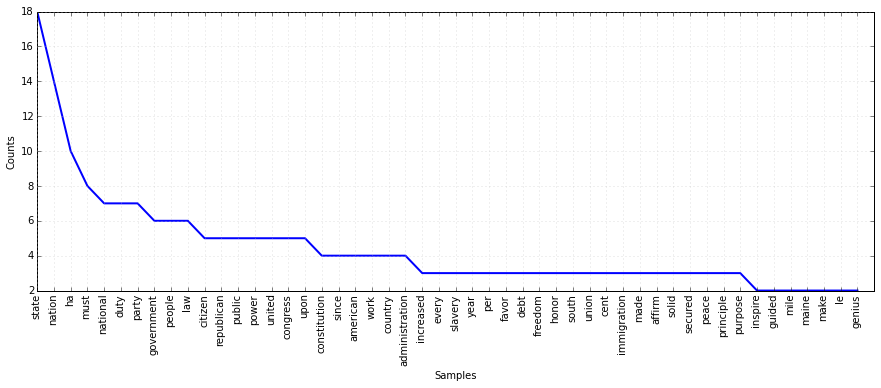

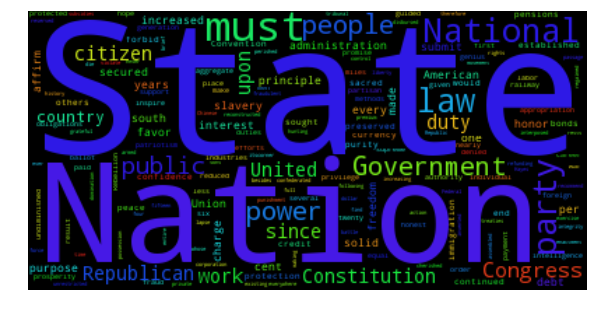

Democrat 1880 50 Most Common Words

[(u'ha', 15), (u'reform', 14), (u'public', 14), (u'party', 12), (u'people', 11), (u'necessary', 9), (u'upon', 8), (u'federal', 7), (u'change', 7), (u'time', 7), (u'denounce', 6), (u'state', 6), (u'demand', 6), (u'labor', 5), (u'government', 5), (u'year', 5), (u'men', 5), (u'million', 5), (u'american', 5), (u'one', 5), (u'late', 4), (u'secretary', 4), (u'house', 4), (u'sum', 4), (u'issue', 4), (u'resumption', 4), (u'system', 4), (u'eleven', 4), (u'hundred', 4), (u'taxation', 4), (u'representative', 4), (u'currency', 4), (u'shall', 4), (u'office', 3), (u'four', 3), (u'treasury', 3), (u'resolved', 3), (u'fraud', 3), (u'every', 3), (u'republican', 3), (u'race', 3), (u'per', 3), (u'power', 3), (u'industry', 3), (u'honest', 3), (u'expense', 3), (u'whole', 3), (u'revenue', 3), (u'service', 3), (u'waste', 3)]


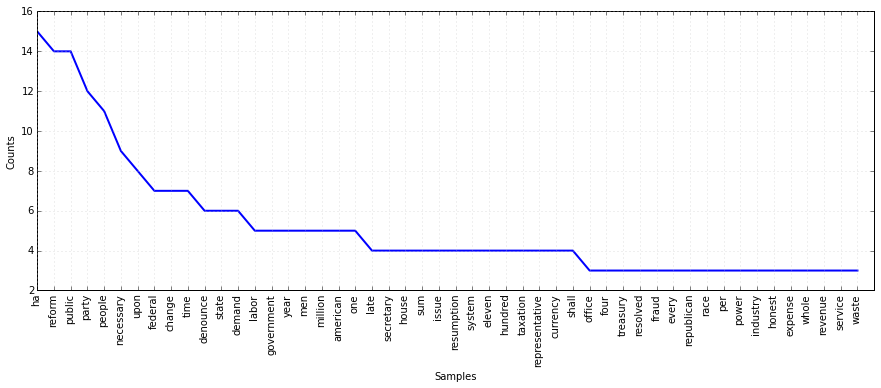

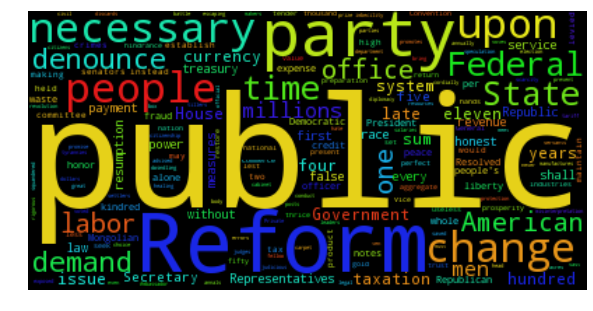

In [6]:
rep_common_words(1880,50).plot(50, cumulative=False)
rep_wordcloud(1880)

dem_common_words(1880,50).plot(50, cumulative=False)
dem_wordcloud(1880)

Republican 2012 50 Most Common Words

[(u'american', 151), (u'government', 149), (u'ha', 142), (u'state', 141), (u'federal', 112), (u'must', 110), (u'support', 95), (u'republican', 84), (u'right', 83), (u'current', 83), (u'law', 77), (u'people', 77), (u'program', 77), (u'administration', 74), (u'nation', 72), (u'america', 67), (u'job', 67), (u'national', 63), (u'public', 61), (u'service', 60), (u'policy', 59), (u'need', 58), (u'country', 57), (u'system', 56), (u'president', 55), (u'economic', 54), (u'call', 53), (u'tax', 52), (u'family', 51), (u'world', 50), (u'military', 49), (u'security', 49), (u'private', 48), (u'new', 47), (u'energy', 44), (u'ensure', 43), (u'work', 42), (u'united', 40), (u'every', 38), (u'force', 38), (u'free', 38), (u'reform', 38), (u'party', 38), (u'child', 37), (u'make', 37), (u'effort', 36), (u'care', 36), (u'act', 36), (u'freedom', 36), (u'oppose', 35)]


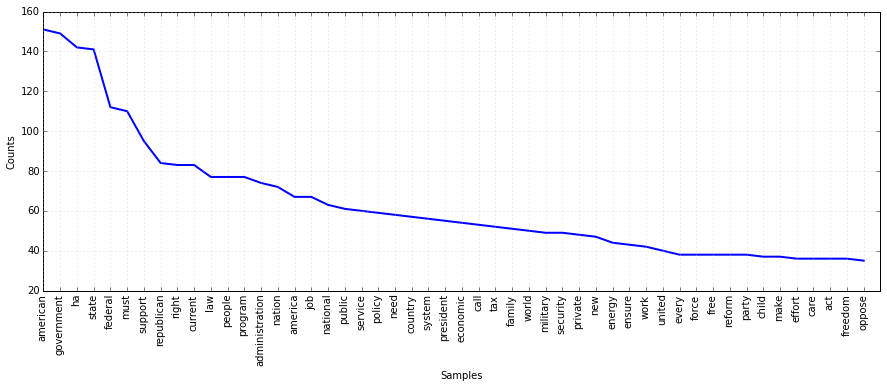

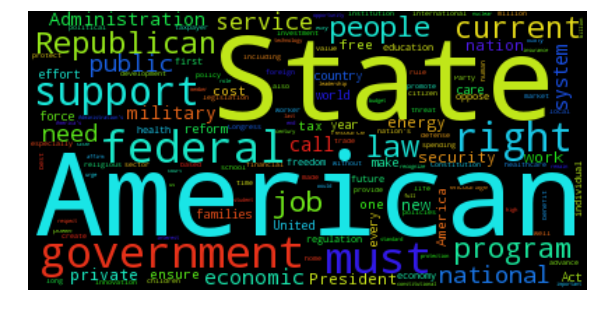

Democrat 2012 50 Most Common Words

[(u'american', 190), (u'health', 102), (u'work', 91), (u'support', 91), (u'must', 90), (u'new', 88), (u'america', 87), (u'people', 85), (u'right', 77), (u'care', 76), (u'government', 75), (u'country', 72), (u'family', 68), (u'ensure', 67), (u'make', 66), (u'security', 66), (u'program', 62), (u'need', 62), (u'state', 62), (u'help', 61), (u'child', 59), (u'national', 59), (u'ha', 59), (u'job', 58), (u'provide', 57), (u'community', 57), (u'also', 56), (u'world', 56), (u'worker', 54), (u'nation', 53), (u'time', 51), (u'energy', 50), (u'education', 50), (u'every', 49), (u'woman', 48), (u'policy', 46), (u'including', 43), (u'service', 42), (u'create', 42), (u'global', 41), (u'believe', 41), (u'million', 40), (u'public', 40), (u'opportunity', 39), (u'economic', 38), (u'development', 38), (u'law', 37), (u'invest', 37), (u'tax', 36), (u'economy', 35)]


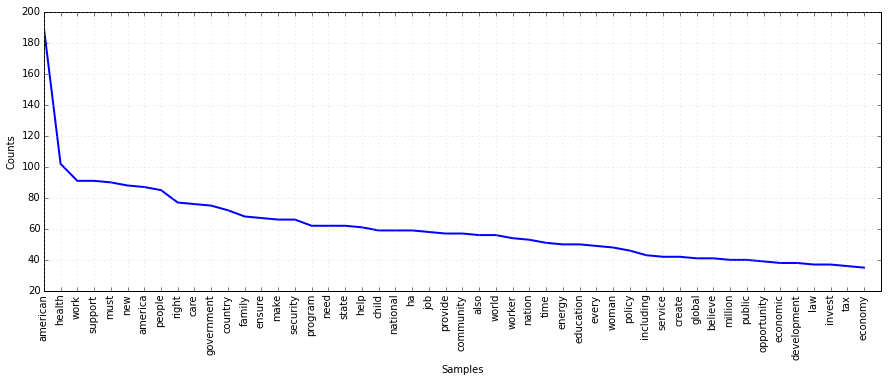

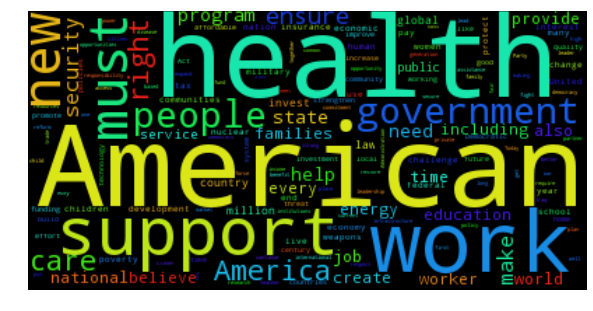

In [7]:
rep_common_words(2012,50).plot(50, cumulative=False)
rep_wordcloud(2012)

dem_common_words(2012,50).plot(50, cumulative=False)
dem_wordcloud(2012)

### Multi-Series Line Plot of Most Important Issues By Party, throughout History

In [8]:
import requests
import json
import urllib

def analyzeText(text):
    api_url = "http://gateway-a.watsonplatform.net/calls/text/TextGetRankedTaxonomy"
    api_key = '83c249378fecccd16552ef1b44b753d39e3c61c7'
    headers = {
        "Accept": "application/json"
    }
    parameters = {
        'outputMode': 'json',
        'apikey' : api_key,
        'text': text
    }
#     parameters = urllib.urlencode(parameters)
    resp = requests.post(api_url, params=parameters, headers=headers)
    data = json.loads(resp.text)
    
    return data

In [9]:
import requests # This command allows us to fetch URLs
from lxml import html # This module will allow us to parse the returned HTML/XML
import pandas # To create a dataframe

def word_extract(url):
    response = requests.get(url) 
    doc = html.fromstring(response.text) 
    
    wordNode = doc.find('.//*[@id="thesaurusentry"]/div')


    words = wordNode.findall('./div/a/h3')
    data = [(a.text_content()) for a in words]
    return data


In [10]:
econ_words =  word_extract("http://www.macmillandictionary.com/us/thesaurus-category/american/economy-and-economics")
war_words = word_extract("http://www.macmillandictionary.com/us/thesaurus-category/american/fighting-in-a-war-and-relating-to-fighting-in-a-war")
health_words = word_extract("http://www.macmillandictionary.com/us/thesaurus-category/american/help-with-social-problems")
law_words = word_extract("http://www.macmillandictionary.com/us/thesaurus-category/american/the-law-laws-and-parts-of-laws")
education_words = word_extract("http://www.macmillandictionary.com/us/thesaurus-category/american/general-words-for-teaching")
immigration_words = word_extract("http://www.macmillandictionary.com/us/thesaurus-category/american/moving-to-and-living-in-a-different-country")

In [11]:
# create topic dictionaries and lists of topic words

dem_economy_dict = {}
rep_economy_dict = {}
all_economy_dict = {}
economy_words = econ_words

dem_war_dict = {}
rep_war_dict = {}
all_war_dict = {}
war_words = war_words

dem_healthcare_dict = {}
rep_healthcare_dict = {}
all_healthcare_dict = {}
healthcare_words = health_words

dem_education_dict = {}
rep_education_dict = {}
all_education_dict = {}
education_words = education_words

dem_immigration_dict = {}
rep_immigration_dict = {}
all_immigration_dict = {}
immigration_words = immigration_words

dem_environment_dict = {}
rep_environment_dict = {}
all_environment_dict = {}
environment_words = ['environment', "climate"]

dem_regu_dict = {}
rep_regu_dict = {}
all_regu_dict = {}
regu_words = law_words

dem_women_dict = {}
rep_women_dict = {}
all_women_dict = {}
women_words = ["women", "reproductive", "sexism", "sexist", "feminism"]

In [12]:
# get all the years

raw_years = range(1856,2013)
years = raw_years[0::4]

In [13]:
# method for making creating topic dictionaries

def create_topic_dict(party_dict, topic_dict, topic_words, years):    
    for i in years:
        count = 0.0
        for word in party_dict[i]:
            if (word in topic_words):
                count += 1.0
        topic_dict[i] = (count/float(len(party_dict[i]))*100)



In [14]:
# DEMOCRATS
create_topic_dict(dem_dict, dem_economy_dict, economy_words, years)
create_topic_dict(dem_dict, dem_war_dict, war_words, years)
create_topic_dict(dem_dict, dem_healthcare_dict, healthcare_words, years)
create_topic_dict(dem_dict, dem_education_dict, education_words, years)
create_topic_dict(dem_dict, dem_regu_dict, regu_words, years)
create_topic_dict(dem_dict, dem_immigration_dict, immigration_words, years)

# Republicans
create_topic_dict(rep_dict, rep_economy_dict, economy_words, years)
create_topic_dict(rep_dict, rep_war_dict, war_words, years)
create_topic_dict(rep_dict, rep_healthcare_dict, healthcare_words, years)
create_topic_dict(rep_dict, rep_education_dict, education_words, years)
create_topic_dict(rep_dict, rep_regu_dict, regu_words, years)
create_topic_dict(rep_dict, rep_immigration_dict, immigration_words, years)

In [15]:
# test create topic dict method


print rep_economy_dict[2008]

0.395545810224


In [16]:
# Import packages

import numpy as np
import matplotlib.pyplot as pyplot
plt.rcParams['figure.figsize'] = (15, 10)

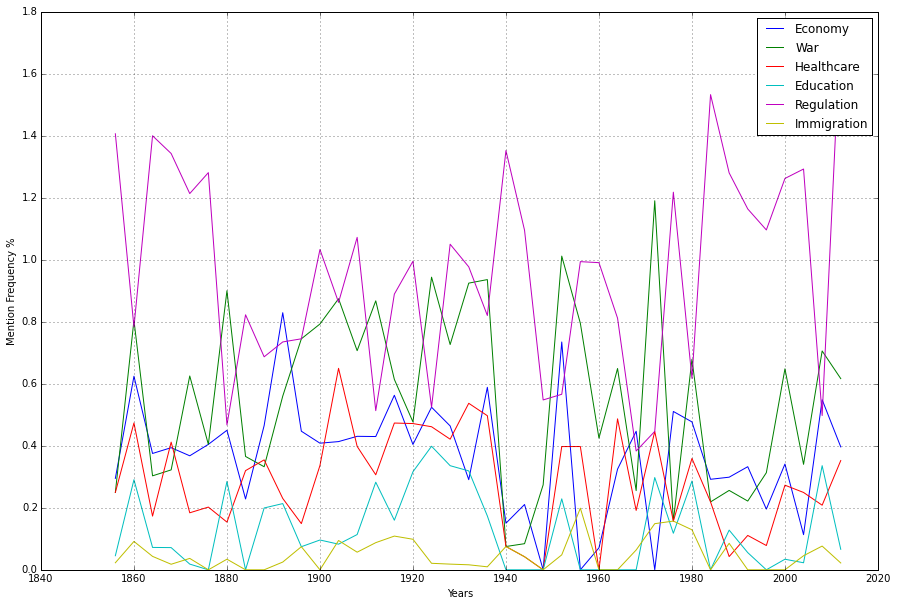

In [17]:
# Democrats Top Issues Through History
plt = pyplot
plt.plot(years, dem_economy_dict.values(), label="Economy")
plt.plot(years, dem_war_dict.values(), label="War")
plt.plot(years, dem_healthcare_dict.values(), label="Healthcare")
plt.plot(years, dem_education_dict.values(), label="Education")
plt.plot(years, dem_regu_dict.values(), label="Regulation")
plt.plot(years, dem_immigration_dict.values(), label="Immigration")
plt.xlabel("Years")
plt.ylabel("Mention Frequency %")
plt.legend()
plt.grid()

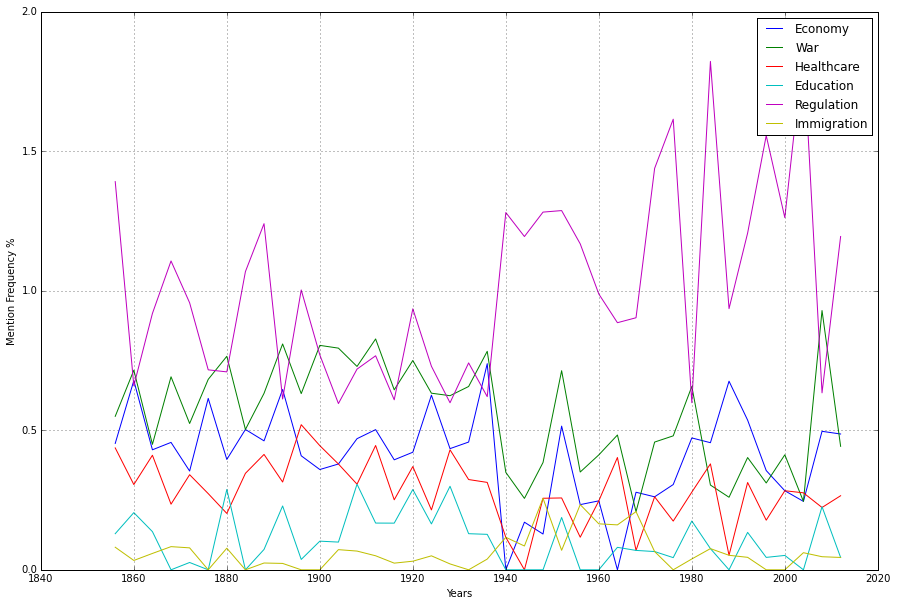

In [18]:
# Republicans Top Issues Through History
plt = pyplot
plt.plot(years, rep_economy_dict.values(), label="Economy")
plt.plot(years, rep_war_dict.values(), label="War")
plt.plot(years, rep_healthcare_dict.values(), label="Healthcare")
plt.plot(years, rep_education_dict.values(), label="Education")
plt.plot(years, rep_regu_dict.values(), label="Regulation")
plt.plot(years, rep_immigration_dict.values(), label="Immigration")
plt.xlabel("Years")
plt.ylabel("Mention Frequency %")
plt.legend()
plt.grid()

#### Comparing Party Mention Frequencies For Each Topic

In [19]:
plt.style.use('ggplot')

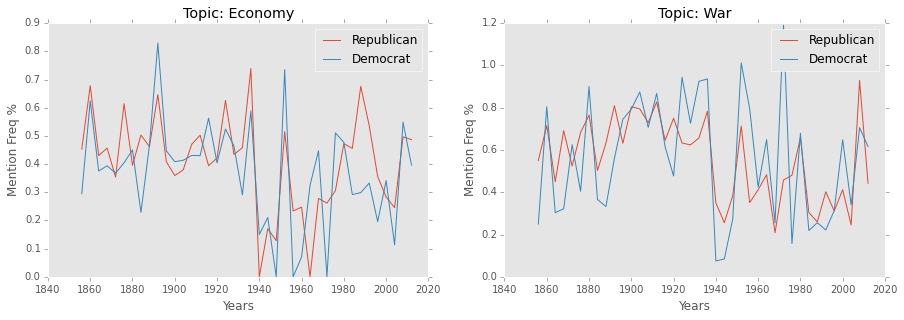

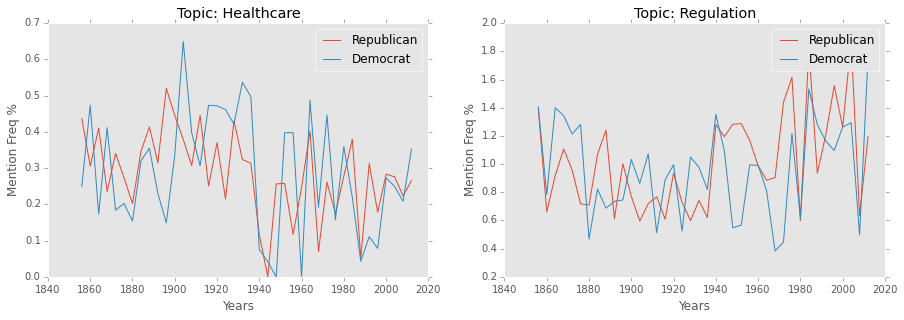

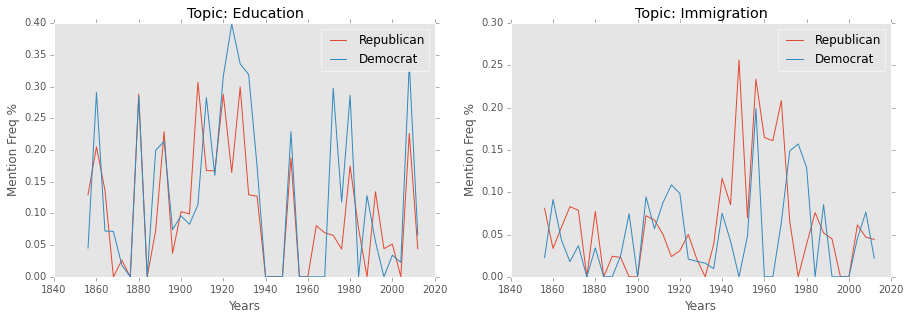

In [20]:
fig = plt.figure(figsize=(15,10))
fig2 = plt.figure(figsize=(15,10))
fig3 = plt.figure(figsize=(15,10))

# Create the first subfigure
sub1 = fig.add_subplot(2,2,1)
sub1.set_xlabel('Years')
sub1.set_ylabel('Mention Freq %')
sub1.set_title('Topic: Economy')
sub1.plot(years, rep_economy_dict.values(), label="Republican")
sub1.plot(years, dem_economy_dict.values(), label="Democrat")
sub1.legend()
sub1.grid()

# Create the second subfigure
sub1 = fig.add_subplot(2,2,2)
sub1.set_xlabel('Years')
sub1.set_ylabel('Mention Freq %')
sub1.set_title("Topic: War")
sub1.plot(years, rep_war_dict.values(), label="Republican")
sub1.plot(years, dem_war_dict.values(), label="Democrat")
sub1.legend()
sub1.grid()

# Create the third subfigure
sub2 = fig2.add_subplot(2,2,1)
sub2.set_xlabel('Years')
sub2.set_ylabel('Mention Freq %')
sub2.set_title("Topic: Healthcare")
sub2.plot(years, rep_healthcare_dict.values(), label="Republican")
sub2.plot(years, dem_healthcare_dict.values(), label="Democrat")
sub2.legend()
sub2.grid()

# Create the fourth subfigure
sub2 = fig2.add_subplot(2,2,2)
sub2.set_xlabel('Years')
sub2.set_ylabel('Mention Freq %')
sub2.set_title("Topic: Regulation")
sub2.plot(years, rep_regu_dict.values(), label="Republican")
sub2.plot(years, dem_regu_dict.values(), label="Democrat")
sub2.legend()
sub2.grid()

# Create the fifth subfigure
sub3 = fig3.add_subplot(2,2,1)
sub3.set_xlabel('Years')
sub3.set_ylabel('Mention Freq %')
sub3.set_title("Topic: Education")
sub3.plot(years, rep_education_dict.values(), label="Republican")
sub3.plot(years, dem_education_dict.values(), label="Democrat")
sub3.legend()
sub3.grid()

# Create the sixth subfigure
sub3 = fig3.add_subplot(2,2,2)
sub3.set_xlabel('Years')
sub3.set_ylabel('Mention Freq %')
sub3.set_title("Topic: Immigration")
sub3.plot(years, rep_immigration_dict.values(), label="Republican")
sub3.plot(years, dem_immigration_dict.values(), label="Democrat")
sub3.legend()
sub3.grid()


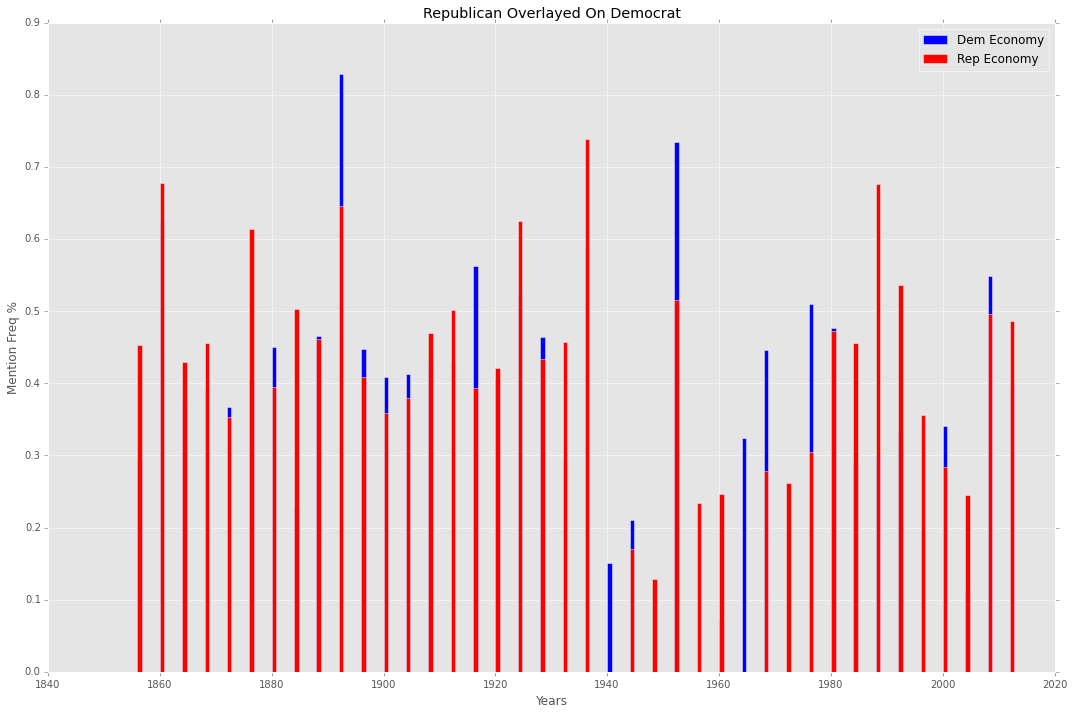

In [21]:
# Bar Plot: Republican Overlayed On Democrat
plt.bar(years, dem_economy_dict.values(), label = 'Dem Economy', color = 'b')
plt.bar(years, rep_economy_dict.values(), label = 'Rep Economy', color = 'r')

plt.xlabel('Years')
plt.ylabel('Mention Freq %')
plt.title('Republican Overlayed On Democrat')
plt.legend()

plt.tight_layout()
plt.show()


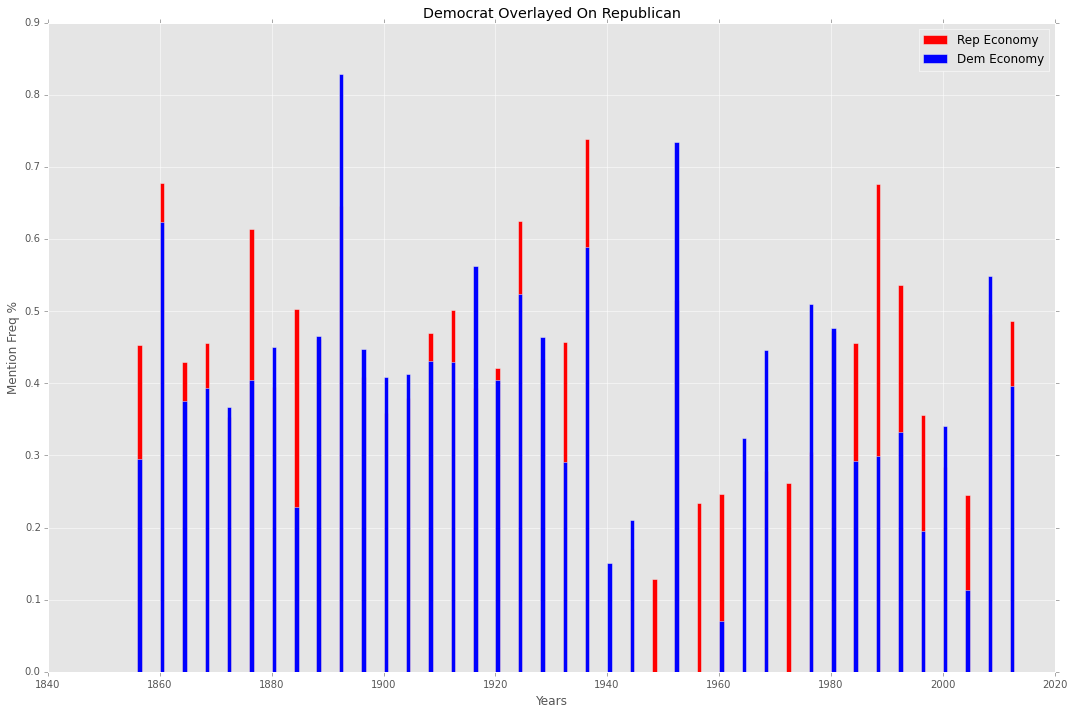

In [22]:
# Bar Plot: Democrat Overlayed On Republican
plt.bar(years, rep_economy_dict.values(), label = 'Rep Economy', color = 'r')
plt.bar(years, dem_economy_dict.values(), label = 'Dem Economy', color = 'b')

plt.xlabel('Years')
plt.ylabel('Mention Freq %')
plt.title('Democrat Overlayed On Republican')
plt.legend()

plt.tight_layout()
plt.show()


# Correlation Matrix

In [23]:
corr_raw_list = [dem_economy_dict, dem_war_dict, dem_healthcare_dict, dem_education_dict, dem_regu_dict, dem_immigration_dict, rep_economy_dict, rep_war_dict, rep_healthcare_dict, rep_education_dict, rep_regu_dict, rep_immigration_dict]

c_index= ["Dem Economy","Dem War", "Dem Healthcare", "Dem Education", "Dem Regu", "Dem Immigration", "Rep Economy", "Rep War", "Rep Healthcare", "Rep Education", "Rep Regu", "Rep Immigration"]
dummy = [0,0,0,0,0,0,0,0,0,0,0,0,0]
corr_list = []
for x in corr_raw_list:
    temp = []
    for y in corr_raw_list:
        x = pd.Series(x)
        y = pd.Series(y)
        z = float("{0:.2f}".format(x.corr(y)))
        temp.append(z);
    corr_list.append(temp);
c_index.append(" ")

In [24]:
df = pd.DataFrame({"Dem Econ": dem_economy_dict.values(), 
                   "Dem War": dem_war_dict.values(),
                  "Dem Health": dem_healthcare_dict.values(),
                  "Dem Edu": dem_education_dict.values(),
                  "Dem Regu": dem_regu_dict.values(),
                  "Dem Immi": dem_immigration_dict.values(),
                  "Rep Econ": rep_economy_dict.values(),
                  "Rep War": rep_war_dict.values(),
                  "Rep Health": rep_healthcare_dict.values(),
                  "Rep Edu": rep_education_dict.values(),
                  "Rep Regu": rep_regu_dict.values(),
                  "Rep Immi": rep_immigration_dict.values()})

corrMatrix = df.corr()
corrMatrix

,Dem Econ,Dem Edu,Dem Health,Dem Immi,Dem Regu,Dem War,Rep Econ,Rep Edu,Rep Health,Rep Immi,Rep Regu,Rep War
Dem Econ,1.000000,0.495697,0.331235,-0.037949,-0.232142,0.284069,0.626481,0.607555,0.226609,-0.477053,-0.522800,0.656716
Dem Edu,0.495697,1.000000,0.473298,0.250029,-0.515307,0.621205,0.473999,0.729435,0.163345,-0.376377,-0.480832,0.638379
Dem Health,0.331235,0.473298,1.000000,0.198348,-0.192290,0.656748,0.250829,0.399208,0.366263,-0.216160,-0.383309,0.523308
Dem Immi,-0.037949,0.250029,0.198348,1.000000,-0.209199,0.222415,-0.107010,0.078257,-0.278622,0.126979,-0.039993,0.027431
Dem Regu,-0.232142,-0.515307,-0.192290,-0.209199,1.000000,-0.514729,-0.044857,-0.347188,0.009028,-0.178877,0.405618,-0.385378
Dem War,0.284069,0.621205,0.656748,0.222415,-0.514729,1.000000,0.266736,0.452677,0.293605,-0.157880,-0.479008,0.598516
Rep Econ,0.626481,0.473999,0.250829,-0.107010,-0.044857,0.266736,1.000000,0.397360,0.201617,-0.551175,-0.402810,0.496386
Rep Edu,0.607555,0.729435,0.399208,0.078257,-0.347188,0.452677,0.397360,1.000000,0.309082,-0.272528,-0.536051,0.650069
Rep Health,0.226609,0.163345,0.366263,-0.278622,0.009028,0.293605,0.201617,0.309082,1.000000,-0.350780,-0.159950,0.483035
Rep Immi,-0.477053,-0.376377,-0.216160,0.126979,-0.178877,-0.157880,-0.551175,-0.272528,-0.350780,1.000000,0.136678,-0.411547


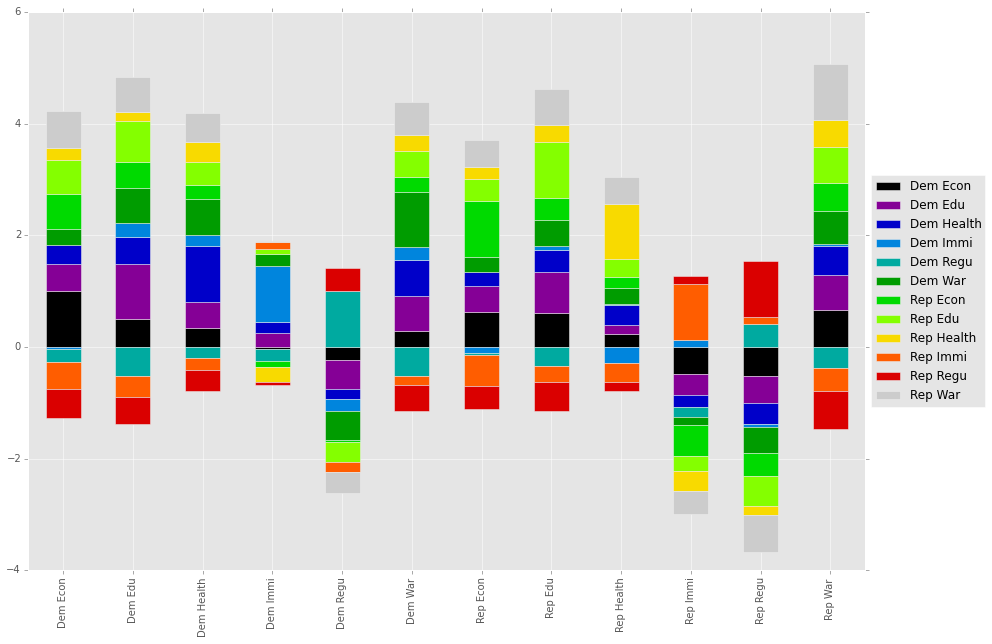

In [25]:
plotty = corrMatrix.plot(kind='bar', stacked = 'true', colormap = 'spectral')
plotty.legend(loc='center left', bbox_to_anchor=(1, 0.5))